In [47]:
import tensorflow as tf
import numpy as np
import os
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt

In [85]:
sess = tf.Session()

def gaussian(x,sigma,mu):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    tmp = (x - mu).dot(inv)
    diag = np.sum(tmp*(x - mu),axis=1)
    return np.exp(-diag/2.0) / (np.sqrt((2 * np.pi) ** n * det))

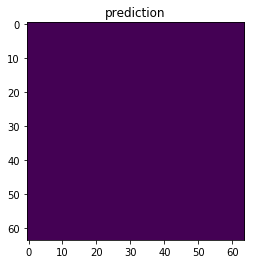

1.0


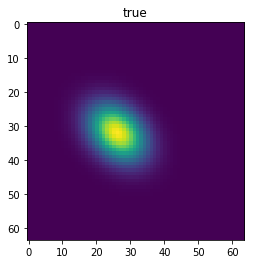

0.9999986216701844


In [105]:
X, Y = np.meshgrid(np.arange(0, 64, 1), np.arange(0, 64, 1)) # X座標,Y座標


# img = np.reshape(gaussian(np.c_[X.ravel(),Y.ravel()], np.array([[24,10],[10,42]]), [50,29]),[64,64])
img = np.ones([64,64])/4096
plt.imshow(img)
plt.title("prediction")
plt.show()
print(np.sum(img))
x = tf.Variable(img) #予測値


img = np.reshape(gaussian(np.c_[X.ravel(),Y.ravel()], np.array([[32,10],[10,32]]), [26,32]),[64,64])
plt.imshow(img)
plt.title("true")
plt.show()
print(np.sum(img))
y = tf.Variable(img) #真値

In [106]:
def compKL(p1,p2,smallV=1e-10):
    kl = tf.reduce_sum(p1*(tf.math.log(p1+smallV) - tf.math.log(p2+smallV)))
    return kl

In [107]:
kl_loss = compKL(x,y)
grad = tf.gradients(kl_loss,x)[0]

sess.run(tf.global_variables_initializer())

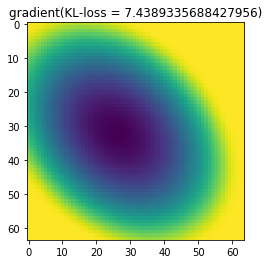

[[15.64042759 15.59499397 15.52756894 ... 15.70808476 15.70808476
  15.70808476]
 [15.56201658 15.46753418 15.33360857 ... 15.70808476 15.70808476
  15.70808476]
 [15.41441331 15.2401774  15.01123874 ... 15.70808476 15.70808476
  15.70808476]
 ...
 [15.7080847  15.70808457 15.70808414 ... 15.70718814 15.70772576
  15.70794594]
 [15.70808475 15.70808471 15.70808459 ... 15.70761323 15.70789394
  15.70801017]
 [15.70808476 15.70808475 15.70808472 ... 15.70784525 15.70798678
  15.70804605]]


In [108]:
grad_value, kl_value = sess.run([grad,kl_loss])
plt.imshow(grad_value)
plt.title("gradient(KL-loss = {})".format(kl_value))
plt.show()

print(grad_value)